### Generate island elevation using compression
1. Generate combination of perlin noises (experiment with amplitude and frequency)
2. Make noise that sets island boundaries (perlin probably won't work)
3. Compress water region and uplift land outlying from water
4. Develop frame of moisture (from random noise and distance from water)
5. Map moisture and height to biome

If the effect would be pretty good I thinking about 3D presentation.

In [15]:
import __init__
import numpy as np
from engine import Noise,Heatmap,CombineNoises
from noises import perlin,simplex,heat,heat
import island_moisture as MCode

In [21]:
Noise(simplex,
	resolution = (1, 1000),
	octaves = 10,
	persistence = 3.2,
	lacunarity = 0.53,
	seed = (0, 1000),
    cmap="gray_r",
    cbar=True)

# Noise(perlin,
# 	resolution = (1, 1000),
# 	octaves = 8,
# 	persistence = 2.0,
# 	lacunarity = 0.5,
# 	seed = (500, 1000),
#     cmap="gray")

interactive(children=(IntSlider(value=500, description='resolution', max=1000, min=1), IntSlider(value=10, des…

interactive(children=(IntSlider(value=500, description='resolution', max=1000, min=1), IntSlider(value=8, desc…

In [17]:
Noise(heat,
	resolution=500,
	temperature = (0, 30),
	x = (0, 300),
	y = (0, 300),
	cbar = True, cmap = 'gray_r')

interactive(children=(IntSlider(value=500, description='resolution', max=1500, min=-500), IntSlider(value=15, …

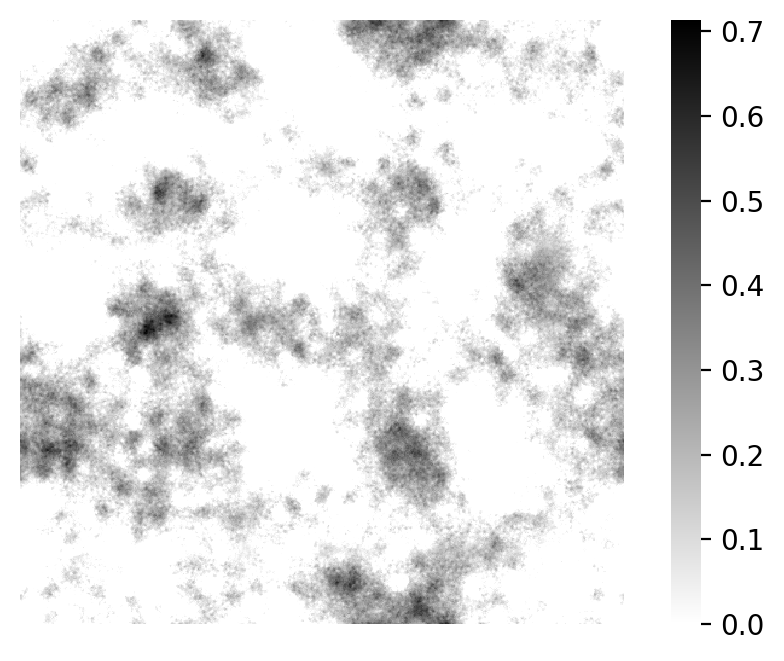

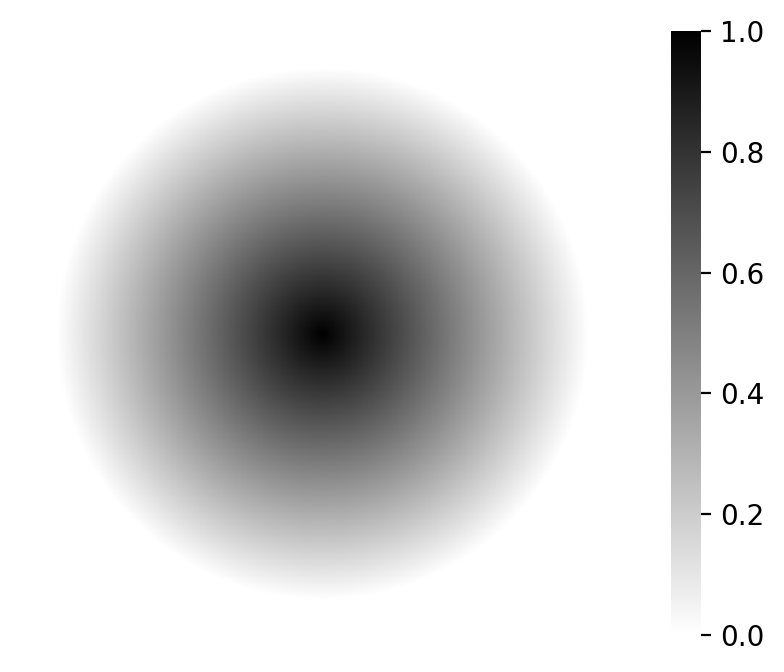

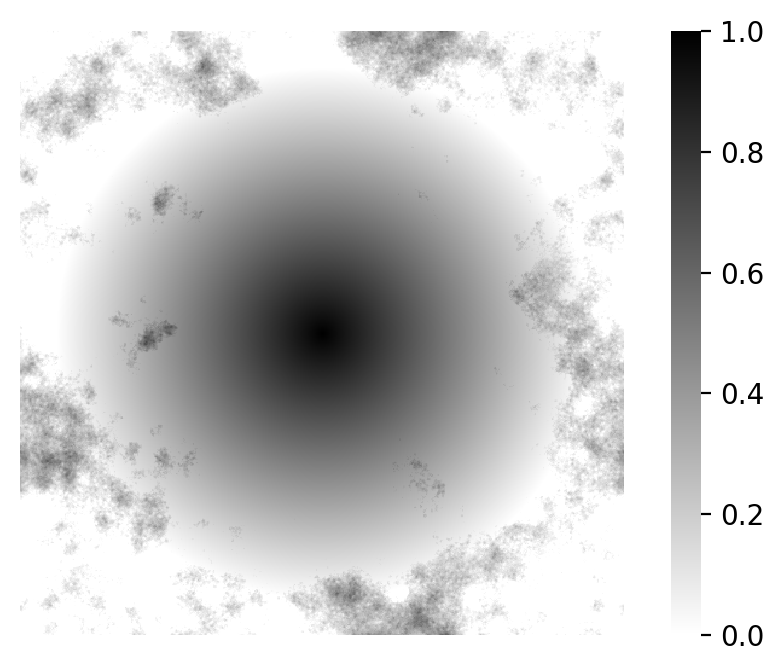

In [18]:
seed = 200
resolution = 500
islandBordersNoise = simplex(resolution=resolution,octaves=4,persistence=2,lacunarity=0.2,seed=seed)
islandBordersMainCircle = (heat(resolution,temperature=19.5,x=resolution/2,y=resolution/2)*2)+1


islandBordersNoiseF = MCode.clearAt(islandBordersNoise,0)
islandBordersMainCircleF = MCode.clearAt(islandBordersMainCircle,0)

islandBorder = MCode.joinOnMax( islandBordersNoiseF,islandBordersMainCircleF)

Heatmap(islandBordersNoiseF, scale = 2.0,cmap="gray_r",cbar=True)
Heatmap(islandBordersMainCircleF, scale = 2.0,cmap="gray_r",cbar=True)
Heatmap(islandBorder,scale = 2.0,cmap="gray_r",cbar=True)

interactive(children=(IntSlider(value=50, description='w1', step=5), IntSlider(value=50, description='w2', ste…

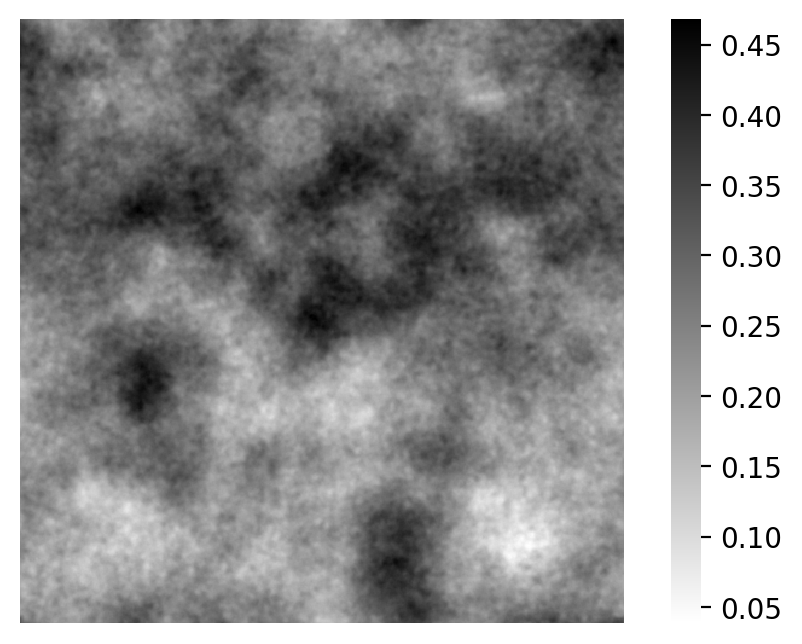

In [19]:
terainNoises = CombineNoises(
    [1.0,0.4,0.1],
    [
        simplex(500,8,2,0.35,seed = seed),
        simplex(500,8,2,0.5,seed=seed+100),
        simplex(500,8,2,0.7,seed=seed+200),
    ]
)

def __helperFunc(seed,w1,w2,w3):
    return CombineNoises(
        [w1/100,w2/100,w3/100],
    [
        simplex(500,8,2,0.35,seed=seed),
        simplex(500,8,2,0.5,seed=seed+100),
        simplex(500,8,2,0.7,seed=seed+200),
    ])

Noise(__helperFunc,w1=(0,100,5),w2=(0,100,5),w3=(0,100,5),seed=(0,1000,10),cbar=True,cmap="gray_r")
Heatmap(terainNoises,scale = 2.0,cmap="gray_r",cbar=True)

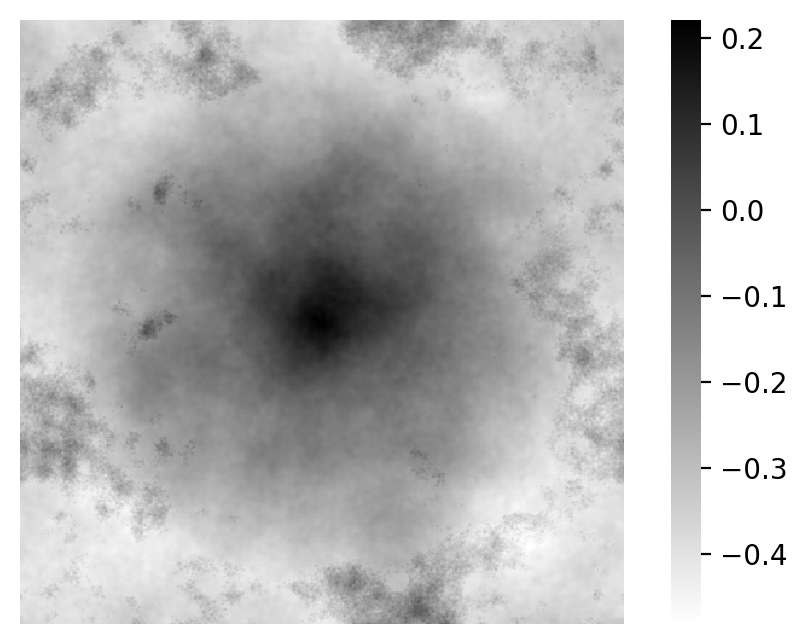

In [20]:
#Compressg

terainHightMap = (terainNoises -1  + islandBorder)/2

Heatmap(terainHightMap,scale = 2.0,cmap="gray_r",cbar=True)

In [ ]:
#moisture

